Random Forest Accuracy: 0.9667
Random Forest Entropy: 1.5801
Random Forest Log Loss: 0.1574
Random Forest Gini Coefficient: 0.6644

Decision Tree Accuracy: 0.9667
Decision Tree Entropy: 1.5801
Decision Tree Log Loss: 0.1669

Random Forest Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         9
  versicolor       1.00      0.92      0.96        12
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30


Decision Tree Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         9
  versicolor       1.00      0.92      0.96        12
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97    

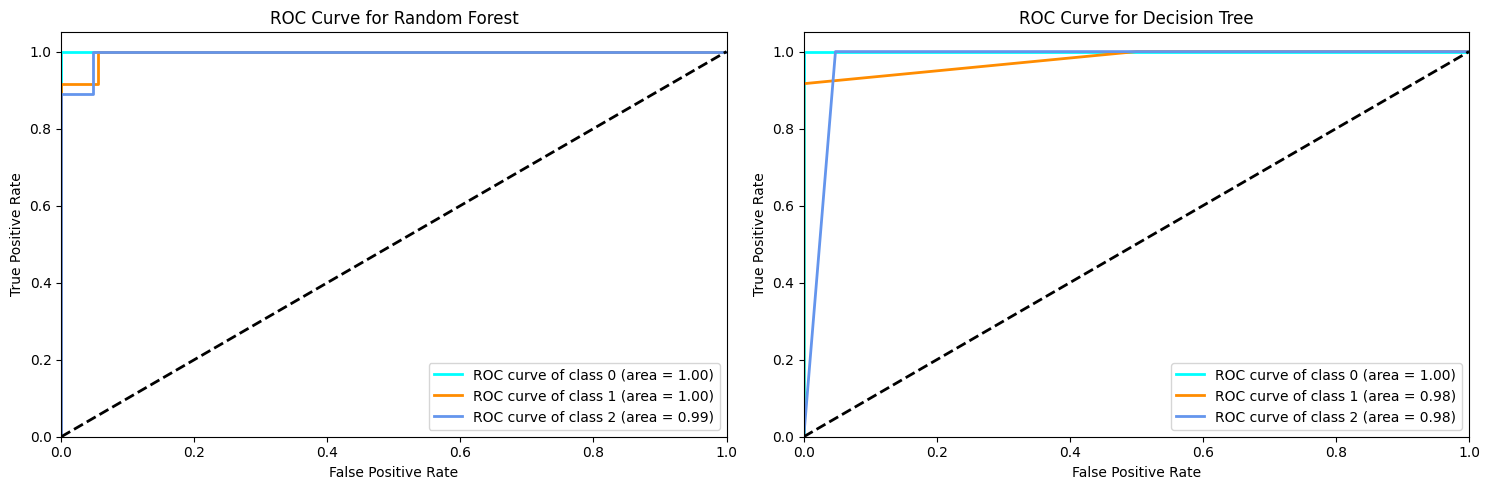

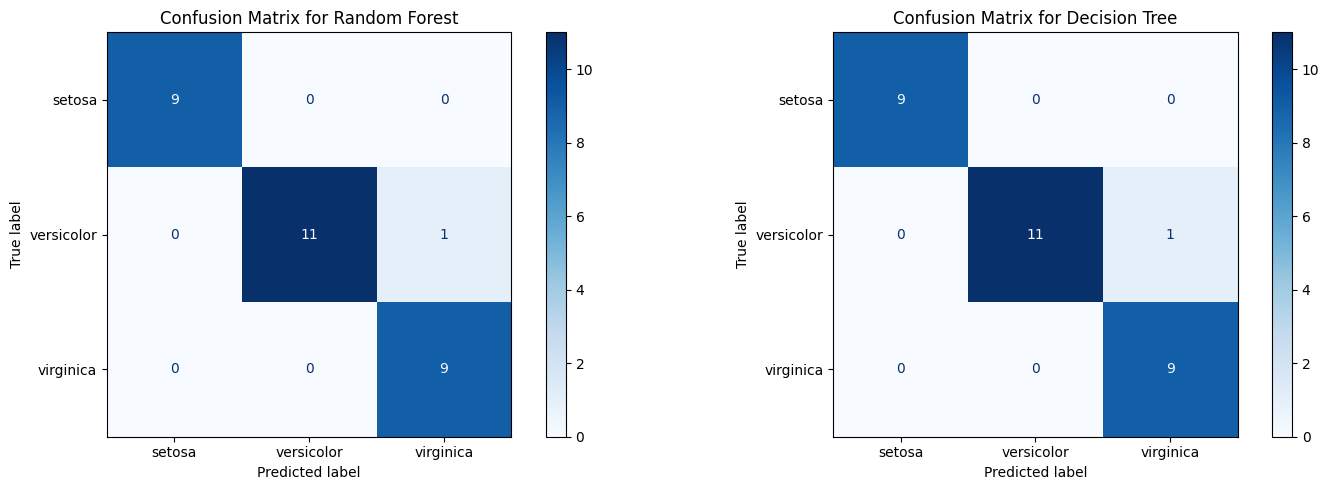

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, ConfusionMatrixDisplay, log_loss
from sklearn.preprocessing import label_binarize, StandardScaler
from itertools import cycle
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from collections import Counter
from math import log2

# Charger les données Iris
iris = datasets.load_iris()
data = iris.data
labels = iris.target

# Normaliser les données
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(data_scaled, labels, test_size=0.2, random_state=50)

# Fonction pour calculer l'entropie
def calculate_entropy(y):
    counter = Counter(y)
    total_instances = len(y)
    entropy = 0.0
    for count in counter.values():
        probability = count / total_instances
        entropy -= probability * log2(probability)
    return entropy

# Fonction pour calculer le coefficient de Gini
def gini_coefficient(y):
    total_instances = len(y)
    if total_instances == 0:
        return 0
    proportions = np.bincount(y) / total_instances
    gini = 1 - np.sum(proportions**2)
    return gini

# Appliquer le modèle de forêt aléatoire
rf_classifier = RandomForestClassifier(n_estimators=150, random_state=50)
rf_classifier.fit(X_train, y_train)

# Prédire sur l'ensemble de test
y_pred_rf = rf_classifier.predict(X_test)
y_score_rf = rf_classifier.predict_proba(X_test)

# Calculer l'entropie pour Random Forest
entropy_rf = calculate_entropy(y_pred_rf)

# Calculer la log loss pour Random Forest
log_loss_rf = log_loss(y_test, y_score_rf)

# Calculer le coefficient de Gini pour Random Forest
gini_rf = gini_coefficient(y_pred_rf)

# Appliquer le modèle d'arbre de décision
dt_classifier = DecisionTreeClassifier(random_state=42, max_depth=2, min_samples_split=3, criterion='entropy')
dt_classifier.fit(X_train, y_train)

# Prédire sur l'ensemble de test avec Decision Tree
y_pred_dt = dt_classifier.predict(X_test)
y_score_dt = dt_classifier.predict_proba(X_test)

# Calculer l'entropie pour Decision Tree
entropy_dt = calculate_entropy(y_pred_dt)

# Calculer la log loss pour Decision Tree
log_loss_dt = log_loss(y_test, y_score_dt)

# Évaluer la performance des modèles
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

print(f'Random Forest Accuracy: {accuracy_rf:.4f}')
print(f'Random Forest Entropy: {entropy_rf:.4f}')
print(f'Random Forest Log Loss: {log_loss_rf:.4f}')
print(f'Random Forest Gini Coefficient: {gini_rf:.4f}')

print(f'\nDecision Tree Accuracy: {accuracy_dt:.4f}')
print(f'Decision Tree Entropy: {entropy_dt:.4f}')
print(f'Decision Tree Log Loss: {log_loss_dt:.4f}')

# Rapport de classification pour Random Forest
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf, target_names=iris.target_names))

# Rapport de classification pour Decision Tree
print("\nDecision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt, target_names=iris.target_names))

# Matrice de confusion pour Random Forest
print("\nRandom Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

# Matrice de confusion pour Decision Tree
print("\nDecision Tree Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))

# Binariser les étiquettes pour les courbes ROC
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]

# Courbes ROC pour Random Forest
fpr_rf = dict()
tpr_rf = dict()
roc_auc_rf = dict()
for i in range(n_classes):
    fpr_rf[i], tpr_rf[i], _ = roc_curve(y_test_bin[:, i], y_score_rf[:, i])
    roc_auc_rf[i] = auc(fpr_rf[i], tpr_rf[i])

# Courbes ROC pour Decision Tree
fpr_dt = dict()
tpr_dt = dict()
roc_auc_dt = dict()
for i in range(n_classes):
    fpr_dt[i], tpr_dt[i], _ = roc_curve(y_test_bin[:, i], y_score_dt[:, i])
    roc_auc_dt[i] = auc(fpr_dt[i], tpr_dt[i])

# Plot ROC curves
plt.figure(figsize=(15, 5))

# ROC for Random Forest
plt.subplot(1, 2, 1)
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr_rf[i], tpr_rf[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
                   ''.format(i, roc_auc_rf[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.legend(loc="lower right")

# ROC for Decision Tree
plt.subplot(1, 2, 2)
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr_dt[i], tpr_dt[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
                   ''.format(i, roc_auc_dt[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

# Plot confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Confusion matrix for Random Forest
ConfusionMatrixDisplay.from_estimator(rf_classifier, X_test, y_test, ax=axes[0], cmap=plt.cm.Blues, display_labels=iris.target_names)
axes[0].title.set_text('Confusion Matrix for Random Forest')

# Confusion matrix for Decision Tree
ConfusionMatrixDisplay.from_estimator(dt_classifier, X_test, y_test, ax=axes[1], cmap=plt.cm.Blues, display_labels=iris.target_names)
axes[1].title.set_text('Confusion Matrix for Decision Tree')

plt.tight_layout()
plt.show()